In [65]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.approximation import average_clustering
import community.community_louvain as cl
import pickle
import random
import scipy

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22

# Funciones de utiles.py
from utiles import read_graph , read_graph_weighted,get_graph_pos , drop_weights

In [66]:
EMAIL_PATH = 'datasets/email.txt'
TERRORIST_PATH = 'datasets/terrorist.txt'
EMAIL_LABELS_PATH = 'datasets/email_labels.txt'

# Leemos los grafos
email = read_graph(EMAIL_PATH)
terr= read_graph_weighted(TERRORIST_PATH)

# Leemos las etiquetas del dataset de email
array = np.loadtxt(EMAIL_LABELS_PATH, dtype=int)
email_labels=list(array[:,1]) 


terrorist_unweighted = terr.copy()
drop_weights(terrorist_unweighted)
terrorist_unweighted.remove_edges_from(nx.selfloop_edges(terrorist_unweighted)) #remuevo autoenlaces NO HAY
print(terrorist_unweighted)

email.remove_edges_from(nx.selfloop_edges(email))  # Borrar autoenlaces
emailcc = sorted(nx.connected_components(email), key=len, reverse=True)
email_giant = email.subgraph(emailcc[0])



Graph with 64 nodes and 243 edges


In [55]:
modulos = nx.community.girvan_newman(terrorist_unweighted)
modularidad=[] # ESTE EL EL INDICE DE MODULARIDAD (Q) QUE QUEREMOS OPTIMIZAR
mod_max = -999
for communities in modulos:
    n_modularidad = nx.community.modularity(terrorist_unweighted,tuple(sorted(c) for c in communities)) # CALCULAMOS Q PARA CADA ITERACION
    modularidad.append(n_modularidad)
    if n_modularidad>mod_max: # ME GUARDO LA MAXIMA MODULARIDAD ENCONTRADA, Y LA PARTICIÓN DE COMUNIDADES CORRESPONDIENTE
      mod_max=n_modularidad
      com_max = tuple(sorted(c) for c in communities)


k=np.argmax(modularidad)
print('La modularidad de la partición óptima es:',mod_max)
print('La partición óptima tiene ',len(com_max), ' comunidades')
print('La partición óptima es:',com_max)

La modularidad de la partición óptima es: 0.3955189757658893
La partición óptima tiene  15  comunidades
La partición óptima es: ([np.int64(0), np.int64(1), np.int64(2), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(36)], [np.int64(3), np.int64(4), np.int64(16), np.int64(17), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(57), np.int64(58)], [np.int64(18), np.int64(35), np.int64(38), np.int64(54), np.int64(55), np.int64(56)], [np.int64(30), np.int64(39), np.int64(40), np.int64(43)], [np.int64(31)], [np.int64(32)], [np.int64(33)], [np.int64(34)], [np.int64(37)], [np.int64(41)], [np.int64(42)], [np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(60), np.int64(61)], [np.int64(53)], [

In [56]:
def partition_set_to_dict(m):
    d = {}
    for i, c in enumerate(m):
        for n in c:
            d[n] = i
    return d

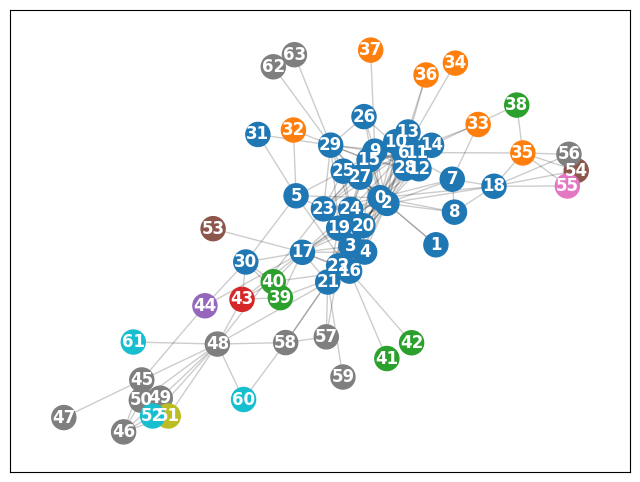

In [58]:
values = [v for n,v in partition_set_to_dict(com_max).items()] # uso como label (color) la comunidad a la que pertenece cada nodo
layout=nx.spring_layout(terrorist_unweighted,iterations=1000) # elegimos como layout el grafo percibido
plt.figure()
nx.draw_networkx_nodes(terrorist_unweighted, layout, node_size=300, node_color = values,cmap=plt.cm.tab10)
nx.draw_networkx_labels(terrorist_unweighted, layout,font_weight='bold', font_color='white')
nx.draw_networkx_edges(terrorist_unweighted, layout, alpha=0.2)


La modularidad de la partición óptima es: 0.4483141120086707


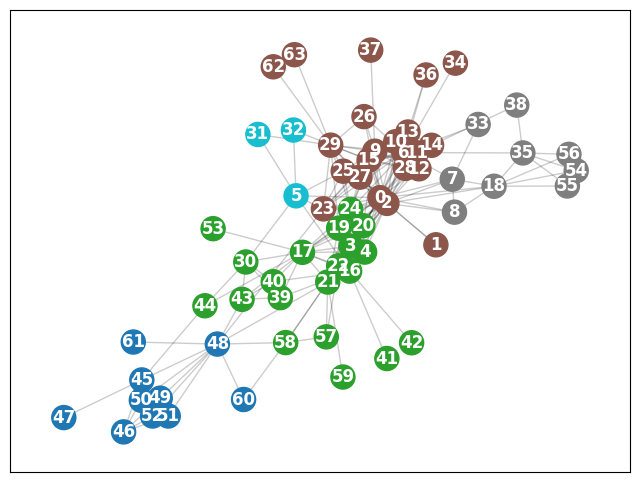

In [59]:
modulos = cl.best_partition(terrorist_unweighted)
print('La modularidad de la partición óptima es:',cl.modularity(modulos,terrorist_unweighted))
values_per = [v for n,v in modulos.items()]

nx.draw_networkx_nodes(terrorist_unweighted, layout, node_size=300, node_color = values_per,cmap=plt.cm.tab10)
nx.draw_networkx_labels(terrorist_unweighted, layout,font_weight='bold', font_color='white')
nx.draw_networkx_edges(terrorist_unweighted, layout, alpha=0.2)

La modularidad de la partición óptima es: 0.41605096863851865


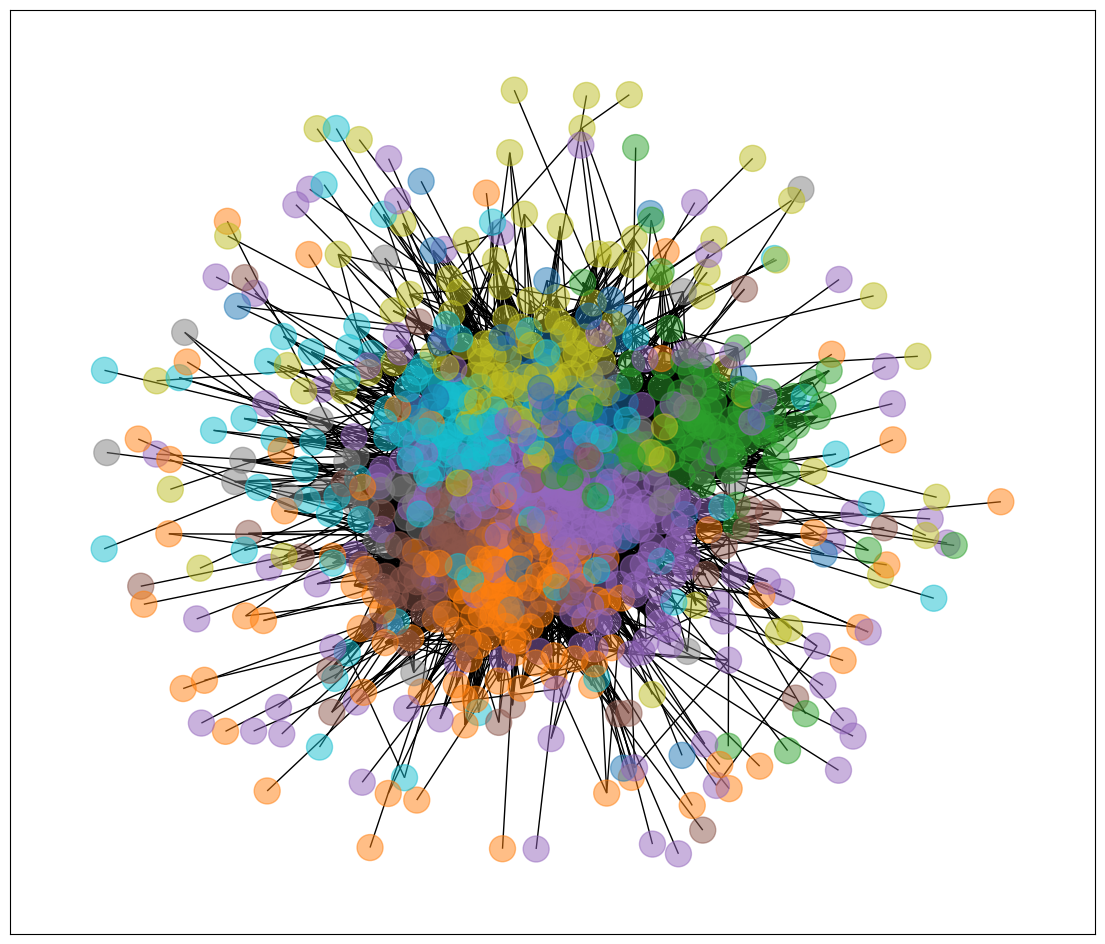

In [ ]:

# Compute layout
layout = nx.fruchterman_reingold_layout(email_giant, k=0.25)

modulos = cl.best_partition(email_giant)
print('La modularidad de la partición óptima es:',cl.modularity(modulos,email_giant))
values_per = [v for n,v in modulos.items()]
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(email_giant, layout, node_size=350, node_color = values_per,cmap=plt.cm.tab10, alpha=0.5)
nx.draw_networkx_labels(email_giant, layout,  labels={}, font_weight='bold', font_color='white', font_size=7)
nx.draw_networkx_edges(email_giant, layout, width=1)